In [31]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [33]:
data = pd.read_csv("Stock/ITMG.JK.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-01,29350.0,29650.0,29000.0,29350.0,5209.717285,1773500.0
1,2008-08-04,28450.0,29100.0,28200.0,28450.0,5049.964355,1987500.0
2,2008-08-05,25850.0,28400.0,25400.0,25850.0,4588.456543,2206500.0
3,2008-08-06,25150.0,26500.0,25100.0,25150.0,4464.204590,1121000.0
4,2008-08-07,25600.0,25800.0,25250.0,25600.0,4544.079590,715500.0
...,...,...,...,...,...,...,...
3960,2024-08-29,27225.0,27750.0,27100.0,27175.0,27175.000000,2526100.0
3961,2024-08-30,27175.0,27350.0,27075.0,27225.0,27225.000000,1453400.0
3962,2024-09-02,27600.0,28125.0,27575.0,27675.0,27675.000000,4146500.0
3963,2024-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Memeriksa adanya nilai NaN atau Inf
data = data.dropna()
prices = prices[~np.isnan(prices)]
prices = prices[~np.isinf(prices)]


In [35]:
# Menggunakan kolom 'Close' sebagai target prediksi
prices = data['Close'].values
prices = prices.reshape(-1, 1)

In [36]:
# Menormalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

In [37]:
# Split data menjadi training dan testing
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [38]:
# Membuat dataset untuk LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [39]:
# Membuat data training dan testing
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)  


In [40]:
# Reshape data agar sesuai dengan input LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [41]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Dataset Saham Indonesia  Indonesia Stock Dataset\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - loss: 0.0464 - val_loss: 0.0021
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/s

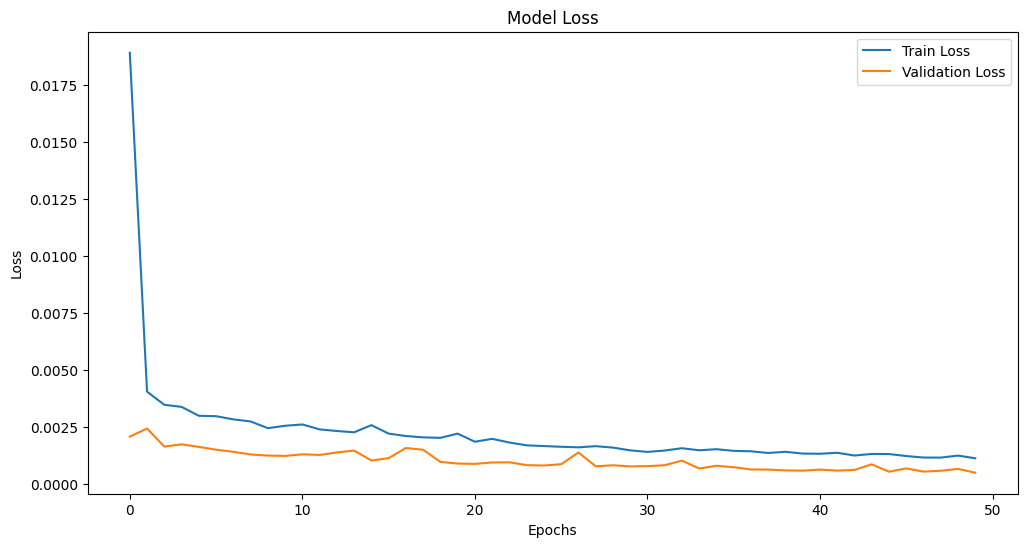

In [44]:
# Plot training dan validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
# Prediksi
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [46]:
# Evaluasi Model
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE : {rmse}')

MSE : 1381165.437752474
MAE : 828.340327368264
RMSE : 1175.2299510106411


In [47]:
# Menggabungkan prediksi dengan harga aktual
combined_predictions = np.concatenate((actual_prices, predicted_prices))

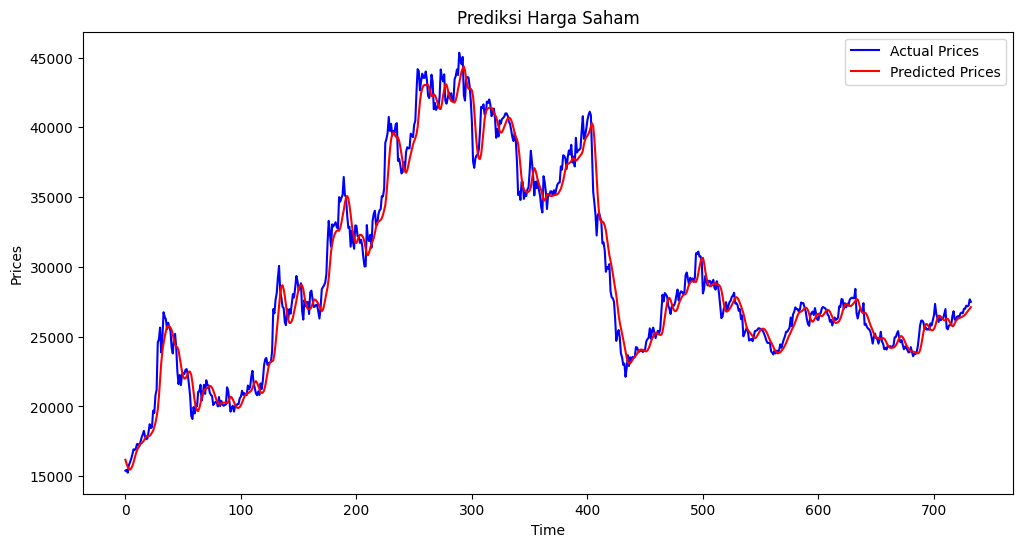

In [48]:
# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Prediksi Harga Saham')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

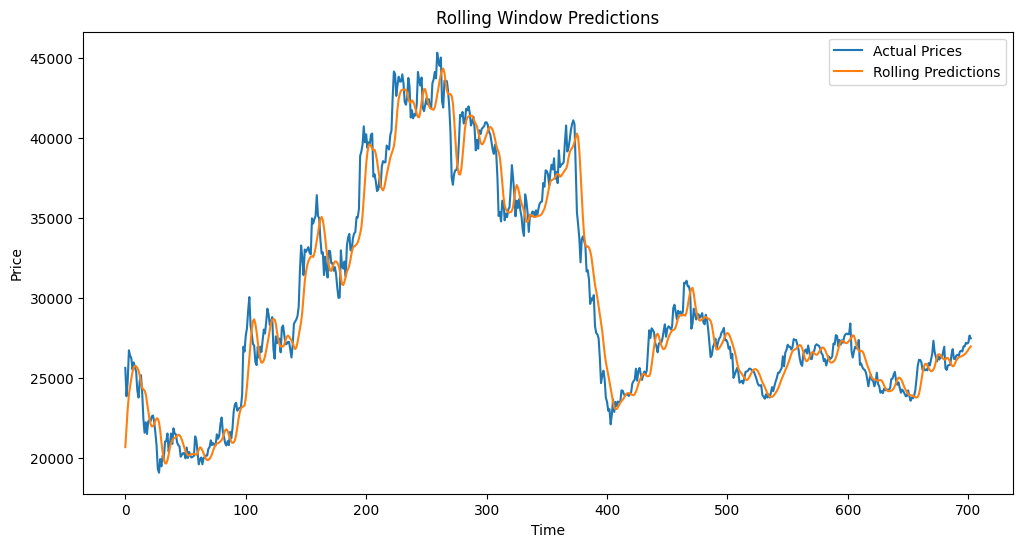

In [49]:
window_size = 30
rolling_predictions = []

for i in range(len(X_test) - window_size):
    input_seq = X_test[i:i + window_size]
    pred = model.predict(input_seq)
    rolling_predictions.append(pred[-1, 0])

rolling_predictions = scaler.inverse_transform(np.array(rolling_predictions).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices[-len(rolling_predictions):], label='Actual Prices')
plt.plot(rolling_predictions, label='Rolling Predictions')
plt.title('Rolling Window Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
# Prediksi satu tahun kedepan
future_predictions = []
last_60_days = scaled_data[-time_step:]
current_input = last_60_days.reshape(1, -1, 1)

for _ in range(365):
    future_price = model.predict(current_input)
    future_predictions.append(future_price[0, 0])
    current_input = np.append(current_input[:, 1: :], [[future_price[0]]], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

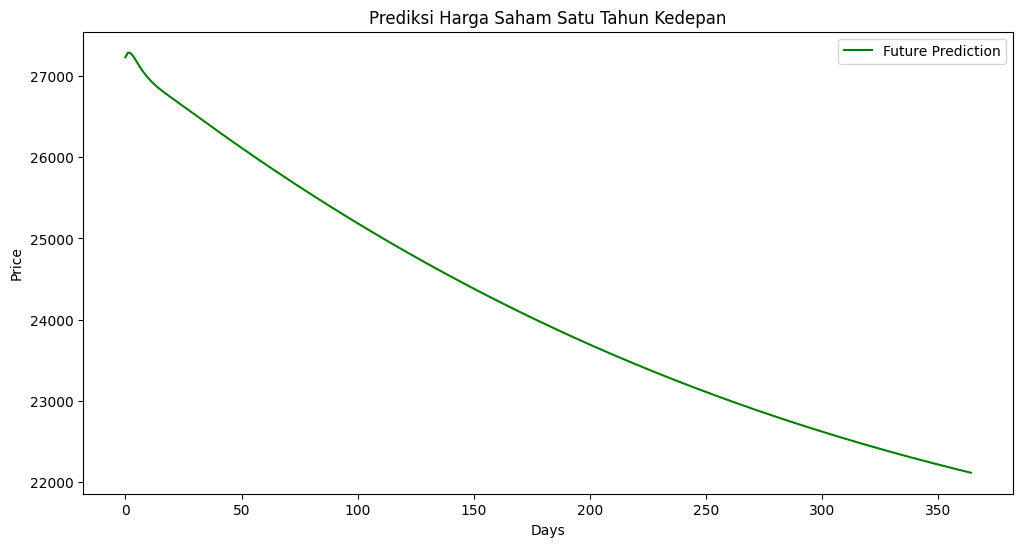

In [52]:
# Plot hasil prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(future_predictions, color='green', label='Future Prediction')
plt.title('Prediksi Harga Saham Satu Tahun Kedepan')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
# Gabung Prediksi Sebelumnya dan Satu Tahun Kedepan
final_predictions = np.concatenate((combined_predictions, future_predictions))

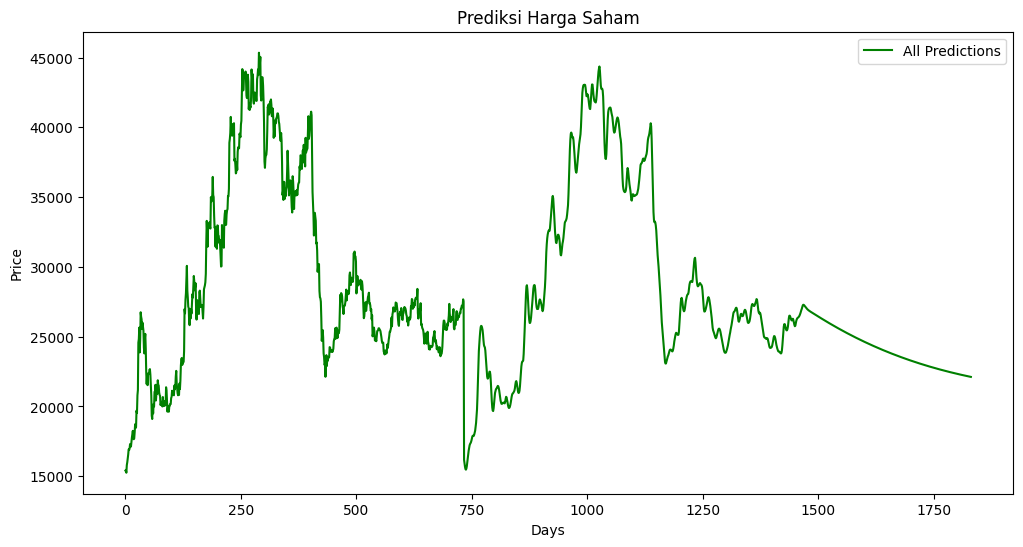

In [55]:
# Plot Prediksi Sebelumnya dan Satu Tahun Kedepan
plt.figure(figsize=(12, 6))
plt.plot(final_predictions, color='green', label='All Predictions')
plt.title('Prediksi Harga Saham')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()